# Сборный проект

### Шаг 1. Откройте файл с данными и изучите общую информацию

Загрузим библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
from matplotlib.pyplot import figure
from scipy import stats as st

Выгрузим данные из файла в датафрейм

In [2]:
df_games=pd.read_csv('/datasets/games.csv')

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.

In [4]:
df_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Данные представленны 11 переменными, object и float типа. Так же мы видим, что в данных Critic_Score и User_Score и Rating имеются пропуски.

### Шаг 2. Подготовьте данные

###### Заменим названия столбцов:

In [5]:
df_games.columns=['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [6]:
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

###### Заменим типы данных

'tbd'- To Be Determined, то есть "Будет определено". Это говорит об отсутствии рейтинга на данную игру. Т.к. python не знает такого определения, то логичнее всего перевести его в разряд NaN, что позволит нам произвести затем замену типа данных на 'float' и восполнить пропуски по возможности.

In [7]:
df_games['user_score']=df_games['user_score'].replace('tbd',pd.np.nan)

In [8]:
df_games['user_score']=df_games['user_score'].astype('float')

###### Создадим столбец 'sales_total' 

In [9]:
df_games['sales_total']=sum([df_games['na_sales'],df_games['eu_sales'],df_games['jp_sales'],df_games['other_sales']])

###### Работа с пропусками

Text(0.5, 0, 'Продажи, млн.долл')

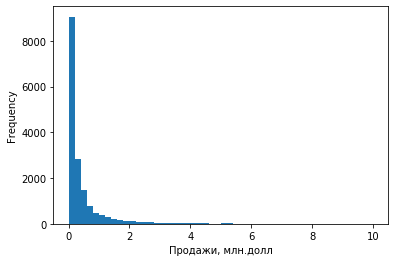

In [10]:
df_games['sales_total'].plot(kind='hist',range=(0,10), bins=50)
plt.xlabel("Продажи, млн.долл")

Как видим, у нас более половины данных находятся в районе 0-1 млн.
В таком случае не получится произвести замену пропусков в рейинг только по выручке. Попробуем прологарифмировать данные столбец и проверим равномерность распределения. Чтобы получилось взять только конечные логарифмы заменим 0 на 0.00001

In [11]:
df_games['sales_total']=df_games['sales_total'].replace(0.0,0.00001)

In [12]:
df_games['sales_total_log']=np.log(df_games['sales_total'])

Text(0.5, 0, 'Продажи прологарифмированные, млн.долл')

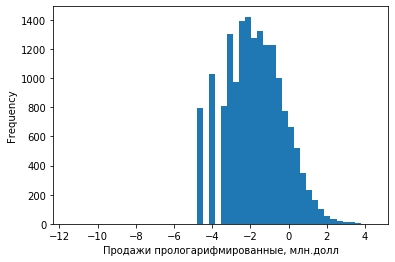

In [13]:
df_games['sales_total_log'].plot(kind='hist',bins=50)
plt.xlabel("Продажи прологарифмированные, млн.долл")

Как видим у нас распределение стало более равномерное, можно попробовать произвести замену.
Разделим на квантили доход с продаж.

In [14]:
df_games['sales_total_log_cut']=pd.cut(df_games['sales_total_log'],bins=60)

In [15]:
df_games['sales_total_log_cut'].value_counts().head()

(-2.223, -1.957]    1422
(-3.019, -2.754]    1195
(-1.692, -1.426]    1169
(-1.426, -1.161]    1087
(-1.957, -1.692]    1050
Name: sales_total_log_cut, dtype: int64

Создадим DF, по которой будем производить замену

In [16]:
df_group=df_games.groupby(['platform','genre','sales_total_log_cut'])[['critic_score','user_score']].mean()

In [17]:
df_group.head()

critic_score  user_score
platform genre  sales_total_log_cut                          
2600     Action (-11.529, -11.247]            NaN         NaN
                (-11.247, -10.982]            NaN         NaN
                (-10.982, -10.717]            NaN         NaN
                (-10.717, -10.451]            NaN         NaN
                (-10.451, -10.186]            NaN         NaN

Создадим отдельный DF в котором будем заменять пропуски.

In [18]:
df_games_replaced=df_games

Заменим пропуски в переменной 'critic_score'

In [19]:
df_games_replaced['critic_score'].mean()

68.96767850559173

Text(0.5, 0, 'Оценки критиков')

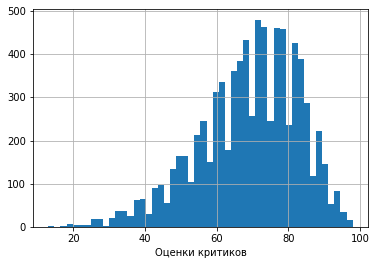

In [20]:
df_games_replaced['critic_score'].hist(bins=50)
plt.xlabel("Оценки критиков")

In [21]:
def score_replace(row):
    if pd.isna(row['critic_score'])==True and pd.isna(row['genre'])==False:
        return df_group.loc[(row['platform'],row['genre'],row['sales_total_log']),:][0]
    else:
        return row['critic_score']

In [22]:
df_games_replaced['critic_score']=df_games_replaced.apply(score_replace,axis=1)

In [23]:
df_games_replaced['critic_score']

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16710    82.0
16711    57.0
16712    66.0
16713    52.0
16714     NaN
Name: critic_score, Length: 16715, dtype: float64

In [24]:
df_games_replaced['critic_score'].mean()

66.95380508522706

Text(0.5, 0, 'Оценки критиков')

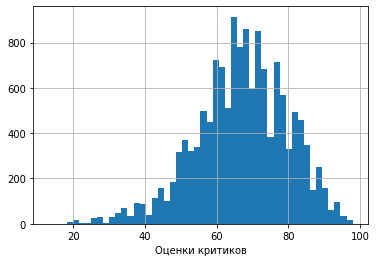

In [25]:
df_games_replaced['critic_score'].hist(bins=50)
plt.xlabel("Оценки критиков")

Text(0.5, 0, 'Оценки критиков')

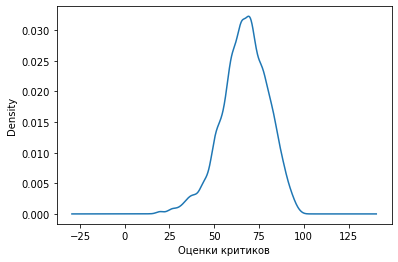

In [26]:
df_games_replaced['critic_score'].plot(kind='kde')
plt.xlabel("Оценки критиков")

Как видим, среднее значение снизилос 68-66, а форма гистограммы изменилась.

Заменим пропуски в переменной 'user_score'

In [27]:
df_games_replaced['user_score'].mean()

7.125046113306982

Text(0.5, 0, 'Оценки пользователей')

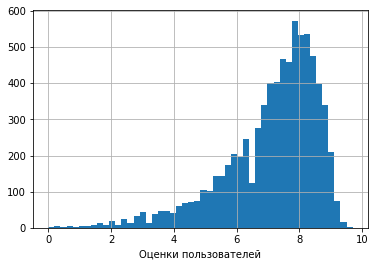

In [28]:
df_games_replaced['user_score'].hist(bins=50)
plt.xlabel("Оценки пользователей")

Text(0.5, 0, 'Оценки пользователей')

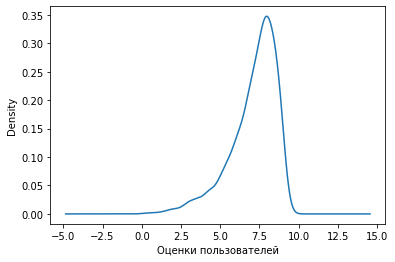

In [29]:
df_games_replaced['user_score'].plot(kind='kde')
plt.xlabel("Оценки пользователей")

In [30]:
def score_replace(row):
    if pd.isna(row['user_score'])==True and pd.isna(row['genre'])==False:
        return df_group.loc[(row['platform'],row['genre'],row['sales_total_log']),:][1]
    else:
        return row['user_score']

In [31]:
df_games_replaced['user_score']=df_games_replaced.apply(score_replace,axis=1)

In [32]:
df_games_replaced['user_score']

0        8.00
1         NaN
2        8.30
3        8.00
4         NaN
         ... 
16710    7.90
16711    4.50
16712    6.35
16713     NaN
16714     NaN
Name: user_score, Length: 16715, dtype: float64

In [33]:
df_games_replaced['user_score'].mean()

7.062905069922218

Text(0.5, 0, 'Оценки пользователей')

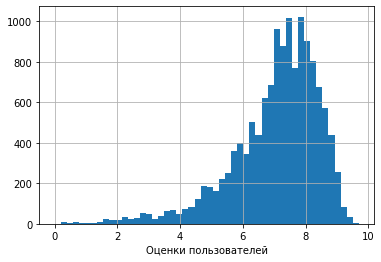

In [34]:
df_games_replaced['user_score'].hist(bins=50)
plt.xlabel("Оценки пользователей")

Text(0.5, 0, 'Оценки пользователей')

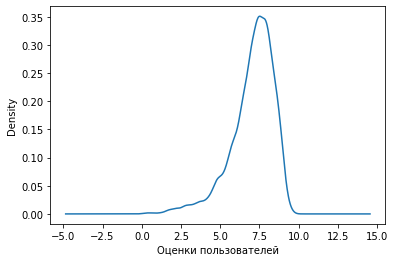

In [35]:
df_games_replaced['user_score'].plot(kind='kde')
plt.xlabel("Оценки пользователей")

In [36]:
df_games_replaced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 14 columns):
name                   16713 non-null object
platform               16715 non-null object
year_of_release        16446 non-null float64
genre                  16713 non-null object
na_sales               16715 non-null float64
eu_sales               16715 non-null float64
jp_sales               16715 non-null float64
other_sales            16715 non-null float64
critic_score           14030 non-null float64
user_score             13583 non-null float64
rating                 9949 non-null object
sales_total            16715 non-null float64
sales_total_log        16715 non-null float64
sales_total_log_cut    16715 non-null category
dtypes: category(1), float64(9), object(4)
memory usage: 1.7+ MB


Как видим заполнение пропусков в ценах не имеет особого смысла, т.к. все данные заполнить не получается и качество замены может сильно искозить данные при анализе, лучше оставить пропуски.  
Изначально заполненных данных нам должно быть достаточно чтобы произвести анализ.

### Шаг 3. Проведите исследовательский анализ данных

###### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [37]:
df_games['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

В качестве важного периода можно выбрать все данные с 1994 года до 2016 года

##### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [38]:
df_games.groupby('platform')['sales_total'].sum().sort_values(ascending=False)

platform
PS2     1255.77001
X360     971.42000
PS3      939.65001
Wii      907.51000
DS       806.12000
PS       730.86000
GBA      317.85000
PS4      314.14000
PSP      294.05000
PC       259.52000
3DS      259.00000
XB       257.74000
GB       255.46000
NES      251.05000
N64      218.68000
SNES     200.04000
GC       198.93000
XOne     159.32000
2600      96.98000
WiiU      82.19000
PSV       54.07000
SAT       33.59000
GEN       30.77000
DC        15.95000
SCD        1.86000
NG         1.44000
WS         1.42000
TG16       0.16000
3DO        0.10000
GG         0.04000
PCFX       0.03000
Name: sales_total, dtype: float64

Выделим топ фирм по самым высоким продажам:PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS,PC, XB, N64, GC, XOne

In [39]:
df_games[df_games['year_of_release']>1993].groupby('platform')['sales_total'].sum().sort_values(ascending=False)[:'XOne'].index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS',
       'PC', 'XB', 'N64', 'GC', 'XOne'],
      dtype='object', name='platform')

In [40]:
df_games_top=df_games[df_games['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS''PC', 'XB', 'N64', 'GC', 'XOne'])]

In [41]:
df_games_top['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', 'N64', 'PS', 'XB',
       'PSP', 'XOne', 'GC'], dtype=object)

Построим распределение по годам и доходу от продаж

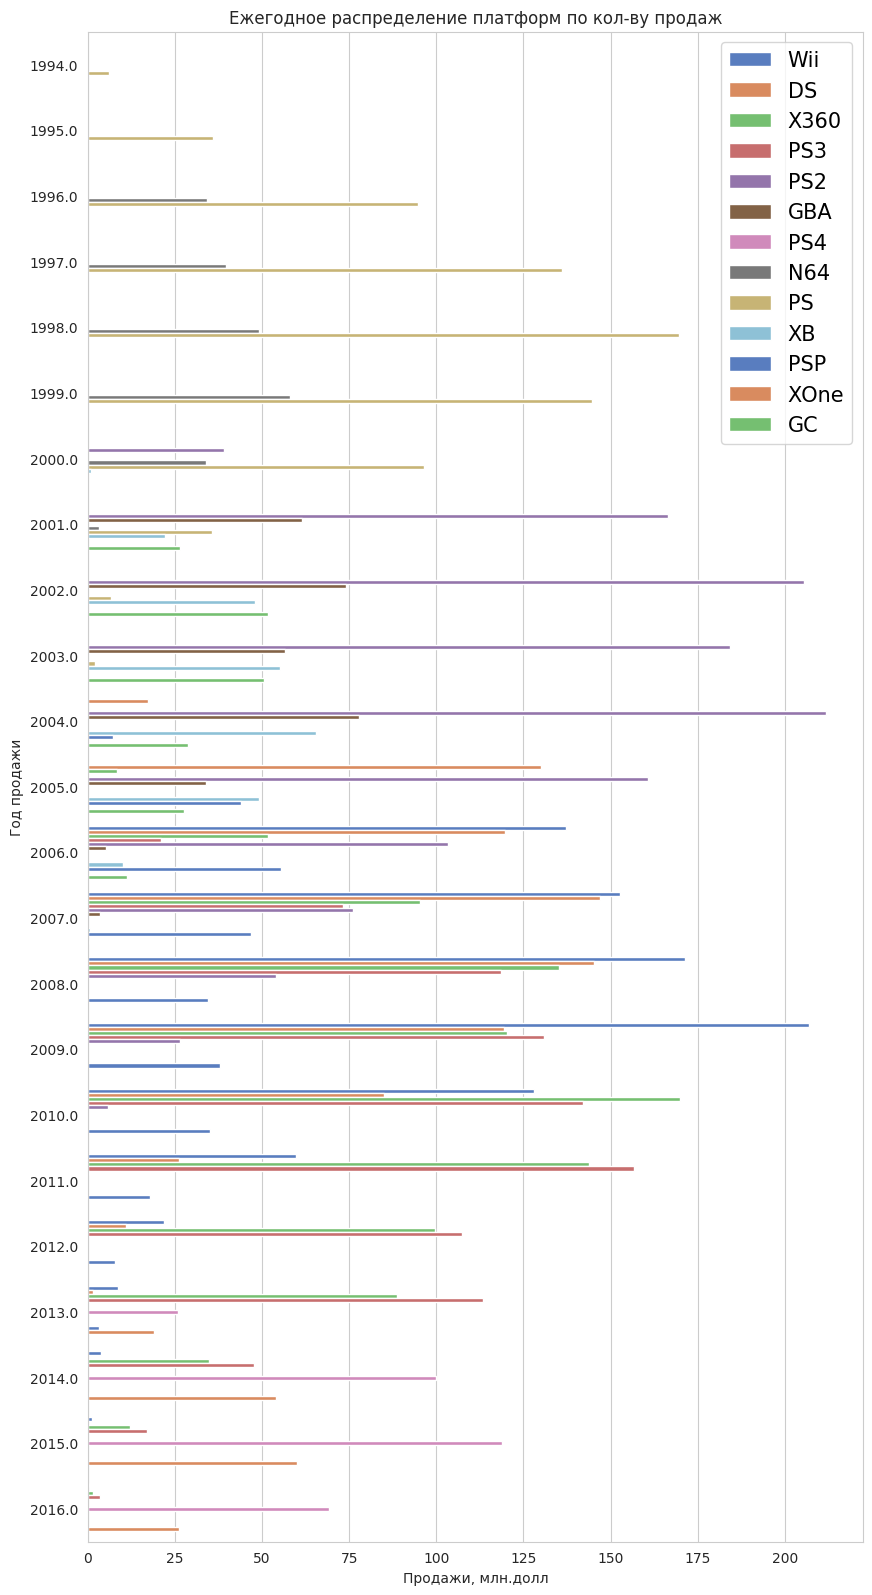

In [42]:
figure(figsize=(10,20),dpi=100)
with sns.axes_style("whitegrid"):
    (sns.barplot(x='sales_total', 
             y='year_of_release', 
             hue='platform',
             data=df_games_top[df_games_top['year_of_release']>1993],
             ci=None,orient='h',
             dodge=True,estimator = sum,
             palette="muted"))
plt.legend(loc=1,prop={'size': 15})
plt.xlabel("Продажи, млн.долл")
plt.ylabel("Год продажи")
plt.title("Ежегодное распределение платформ по кол-ву продаж")
plt.show()

Можно увидеть, что с 1994 по 2000 год лидером являлась PS, с 2001 по 2005 год - PS2,с 2006 по 2009 на рынке активно конкурировали PS3, X360,DS,Wii, причем Wii опережала конкурентов.  
C 2010 по 2013 год продажи Wii и DS стали падать, конкурировали активно только X360 и PS3.  
2014-2016 год лидерство перешло PS4 и XONE  
Можно сделать вывод, что среднее время 'жизни' приставок составляет около 10 лет, но из них около 5 лет выского уровня дохода и активной конкуренции на рынке.  
Новые приставки появляеются примерно каждые 5-6 лет.

###### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

В качестве актуального периода выберем начало продаж X360 и PS3 - 2005 год.Т.к. данные за 2016 год могут быть не полные, то не будем их так же учитывать.

In [43]:
df_games_actual=df_games_top[(df_games_top['year_of_release']<2016) & (df_games_top['year_of_release']>2004)].reset_index(drop=True)

###### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

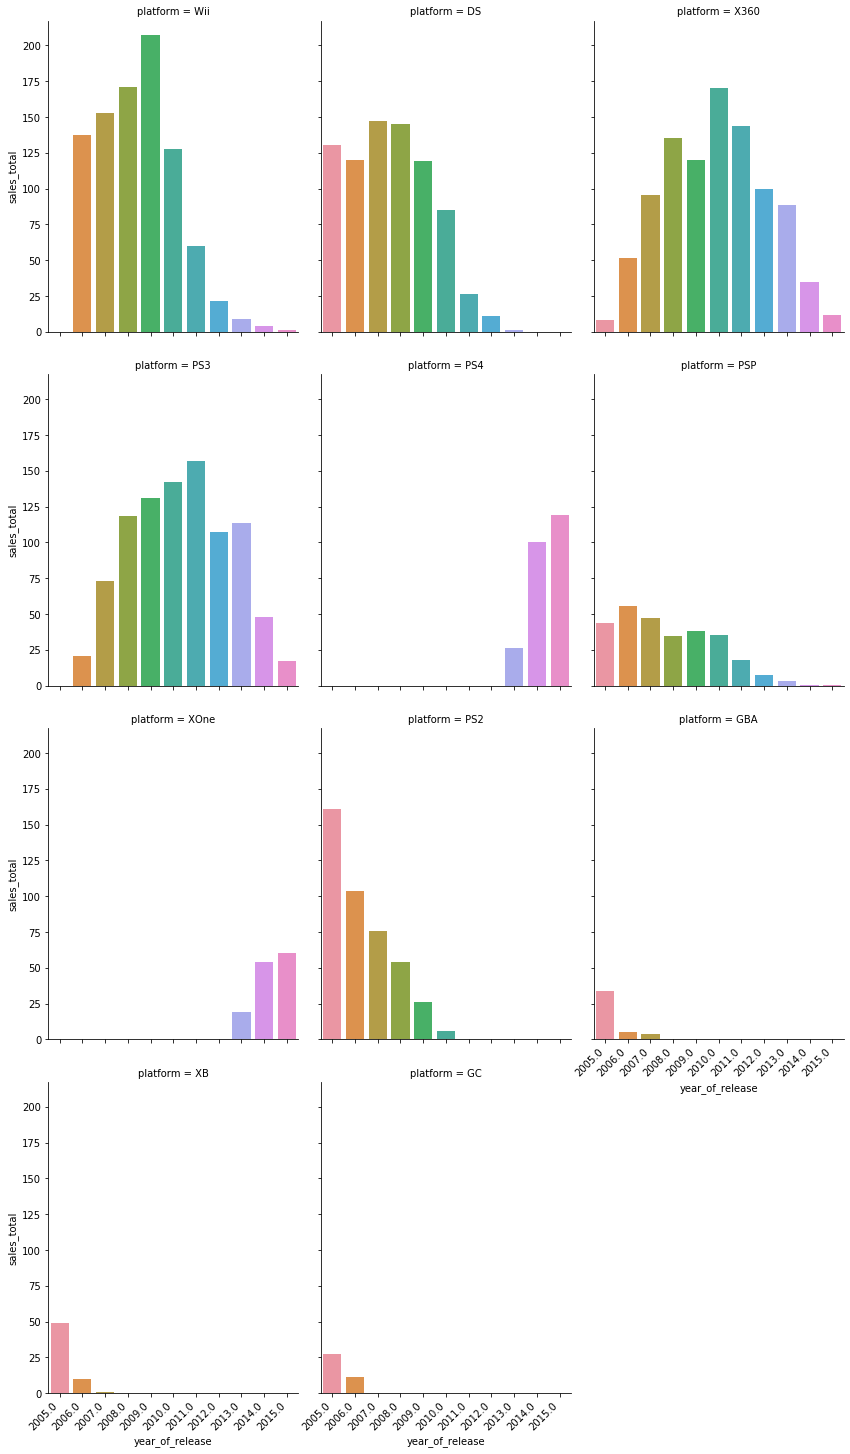

In [44]:
chart=(sns.catplot(y='sales_total',
             x='year_of_release',
             data=df_games_actual,
             col='platform',ci=None,estimator=sum,col_wrap=3, aspect=.8,
             kind='bar'))
for axes in chart.axes.flat:  
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')

Как видим, в 2014 и 2015 году происходит падение дохода от PS3 и X360, т.к. на рынок вышли их обновления PS4 И XOne, продажи которых наоборот- растут год от года. Можно считать их самыми перспективными платформами, причем среди них лидирует PS4.

###### Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

In [45]:
df_group=df_games_actual.groupby('platform')['name'].count().reset_index()

In [46]:
df_group['platform']

0       DS
1      GBA
2       GC
3      PS2
4      PS3
5      PS4
6      PSP
7      Wii
8     X360
9       XB
10    XOne
Name: platform, dtype: object

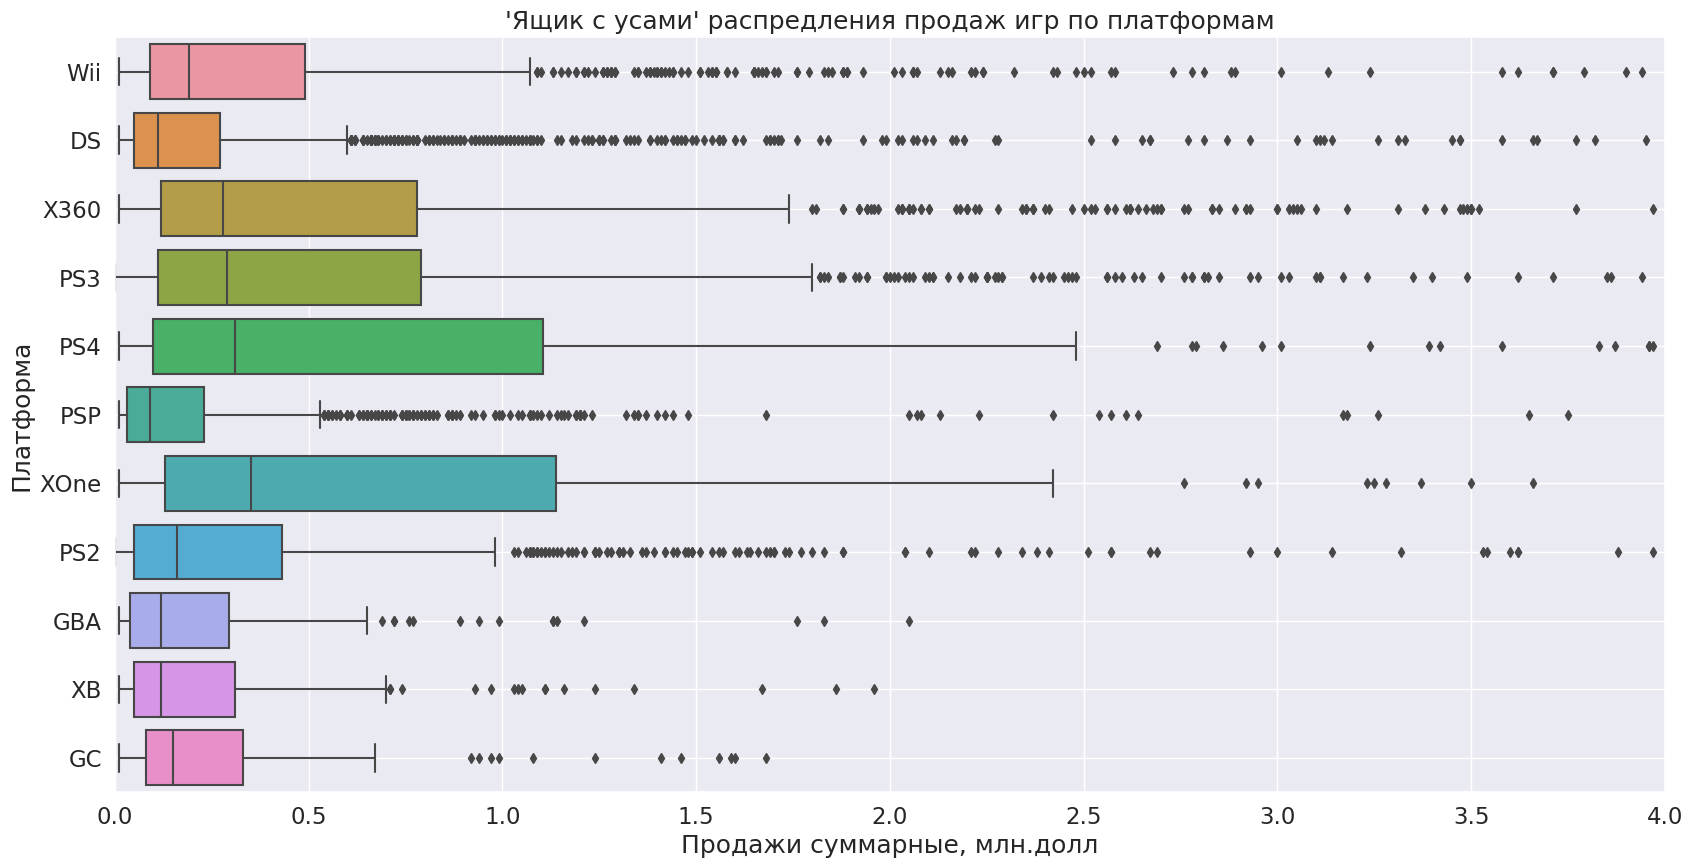

In [47]:
figure(figsize=(20,10),dpi=100)
sns.set(font_scale = 1.5)
chart=sns.boxplot(x='sales_total', 
             y='platform', 
             data=df_games_actual,orient='h')
chart.grid(True)
chart.set(xlim=(0,4))
plt.xlabel("Продажи суммарные, млн.долл")
plt.ylabel("Платформа")
plt.title("'Ящик с усами' распредления продаж игр по платформам")
plt.show()

Как видим основное количесвто игр принесли доход в несколько млн.долл.  
Если оценивать по Q3, то разброс находится в пределах 0.7 - 2.5 млн. долл. Причем мы видим, что к нижнему пределу относятся DS и GBA, игры которые конкурировали с PS2, у которой большая часть продаж нахоидится в лимите до 1 млн.долл. Среднии значения также отличаются, у DC и GBA они составляют 0.1 млн.долл, а у PS2- 0.2 млн.долл.
Среди PS3, X360, Wii мы видим, что доход от продажи игры находится в пределах 1.1 - 1.8 млн. долл. Несмотря на то, что разница в величине Q3  у Wii и PS3 с X360 большая,  1.1 и 1.8 с 1.7 соответственно, среднее значения назодится ближе 0.2 и 0.3 с 0.3 соответственно. 
PS4 и XOne несмотря на недавний выход на рынок имеют самые высокие доходы с продаж игры это 2.5 и 2.4 млн.долл соответственно и медиану в районе 0.3 и 0.2 млн.долл.
Мы можем отметить, что это означает, что несмотря на платформу, бОльшая часть игр приносит небольшой доход, скорее всего основную прибыль платформы получают за счет маленького кол-ва уданых игр, которые пользуются большим спросом


###### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [48]:
df_games_actual['critic_score'].value_counts(bins=10).index

IntervalIndex([(64.0, 72.5], (55.5, 64.0], (72.5, 81.0], (47.0, 55.5], (81.0, 89.5], (38.5, 47.0], (30.0, 38.5], (89.5, 98.0], (21.5, 30.0], (12.914, 21.5]],
              closed='right',
              dtype='interval[float64]')

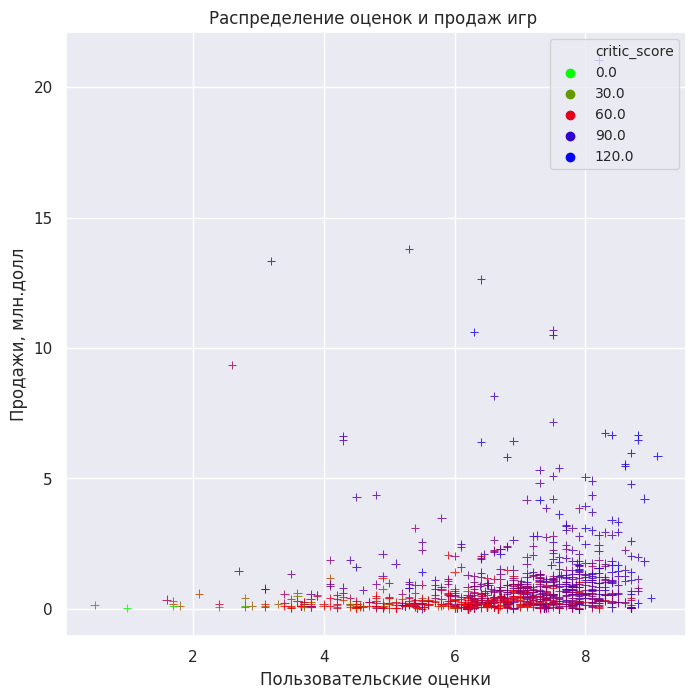

In [49]:
figure(figsize=(8,8),dpi=100)
plt.style.use('seaborn-colorblind')
sns.set(font_scale = 1)
sns.scatterplot(x='user_score', y='sales_total',data=df_games_actual[df_games_actual['platform']=='PS3'],palette='brg_r',hue='critic_score',legend='brief',alpha=0.8,marker='+')
plt.legend(loc=1,prop={'size': 10})

plt.xlabel("Пользовательские оценки")
plt.ylabel("Продажи, млн.долл")
plt.title("Распределение оценок и продаж игр ")
plt.show()

In [50]:
df_games_actual.loc[:,['sales_total','user_score','critic_score']].corr()


,sales_total,user_score,critic_score
sales_total,1.000000,0.085979,0.273248
user_score,0.085979,1.000000,0.493855
critic_score,0.273248,0.493855,1.000000


Как видим, между оценками критиков и пользователей и продажами нет четкой линейной зависимости.  
Чуть сильнее она с оценками критиков, чем пользователей, но все равно очень слабая. Между двумя видами оценок также есть средний уровень связи.  
Что касается распределения, то мы видим, что основной массив данных расположен в уровне продаж до 5 млн.долл. Оценки пользователей  по большей части выше 6, при этом видим, что игры принесшие высокий доход расположены как в районе оценки 8, так и в районе оценки-3. В низкодоходных играх на ряду с низкими оценками есть и и высокие и их большинство.  
В случае с оценками критиков, то ситуация схожая, но у игр с высоким доходом нету очень низких оценок, а у игр с низкой выручкой- есть высокие.  
В сумме все это не дает нам возможности сделать вывод о какой-либо явной зависимости между доходом и оценками.

###### Соотнесите выводы с продажами игр на других платформах.

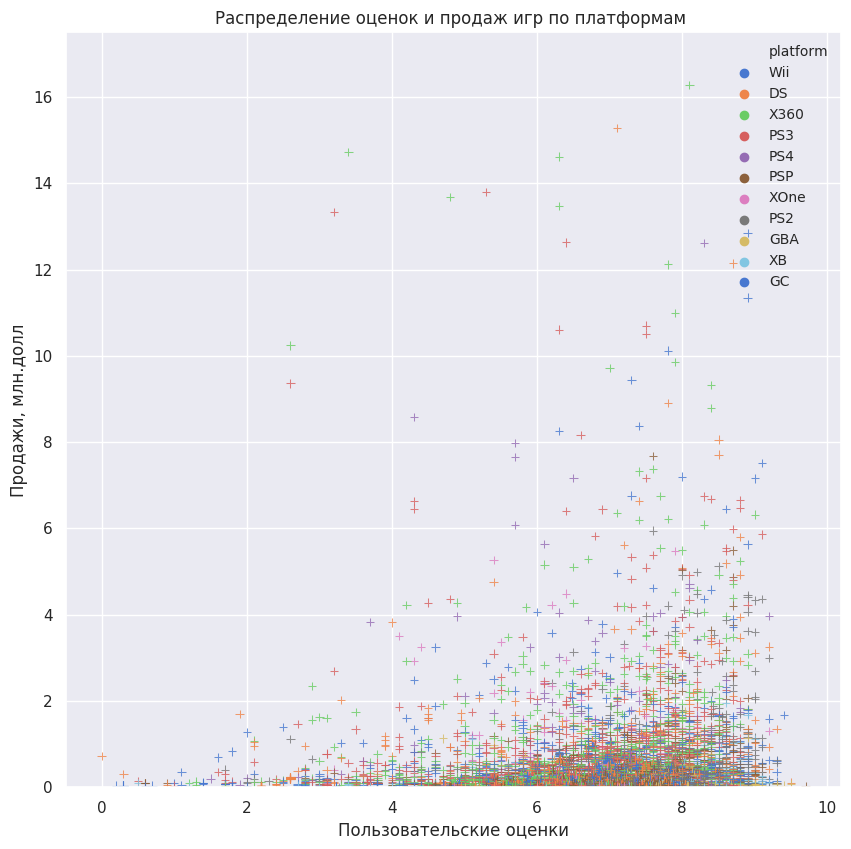

In [51]:
figure(figsize=(10,10),dpi=100)
plt.style.use('seaborn-dark')
sns.set(font_scale = 1)

chart=(sns.scatterplot(x='user_score',
                       y='sales_total',
                       data=df_games_actual,
                       hue='platform',
                       palette='muted',
                       legend='brief',
                       alpha=0.8,
                       marker='+'))
plt.xlabel("Пользовательские оценки")
plt.ylabel("Продажи, млн.долл")
plt.title("Распределение оценок и продаж игр по платформам ")
plt.legend(loc=1,prop={'size': 10})
chart.grid(True)
chart.set(ylim=(0,17.5))
plt.show()

Как видим, у всех платформ распределение оценок пользователей схожим образом с распределением PS3.  
Мы видим, что большое число низкодоходных игр имею высокие оценки, а низкие оценки есть так же и у высокодоходных игр.   
Можно выделить Wii, PS4, XOne имею меньше плохих оценок у игр с высокой выручкой.

###### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

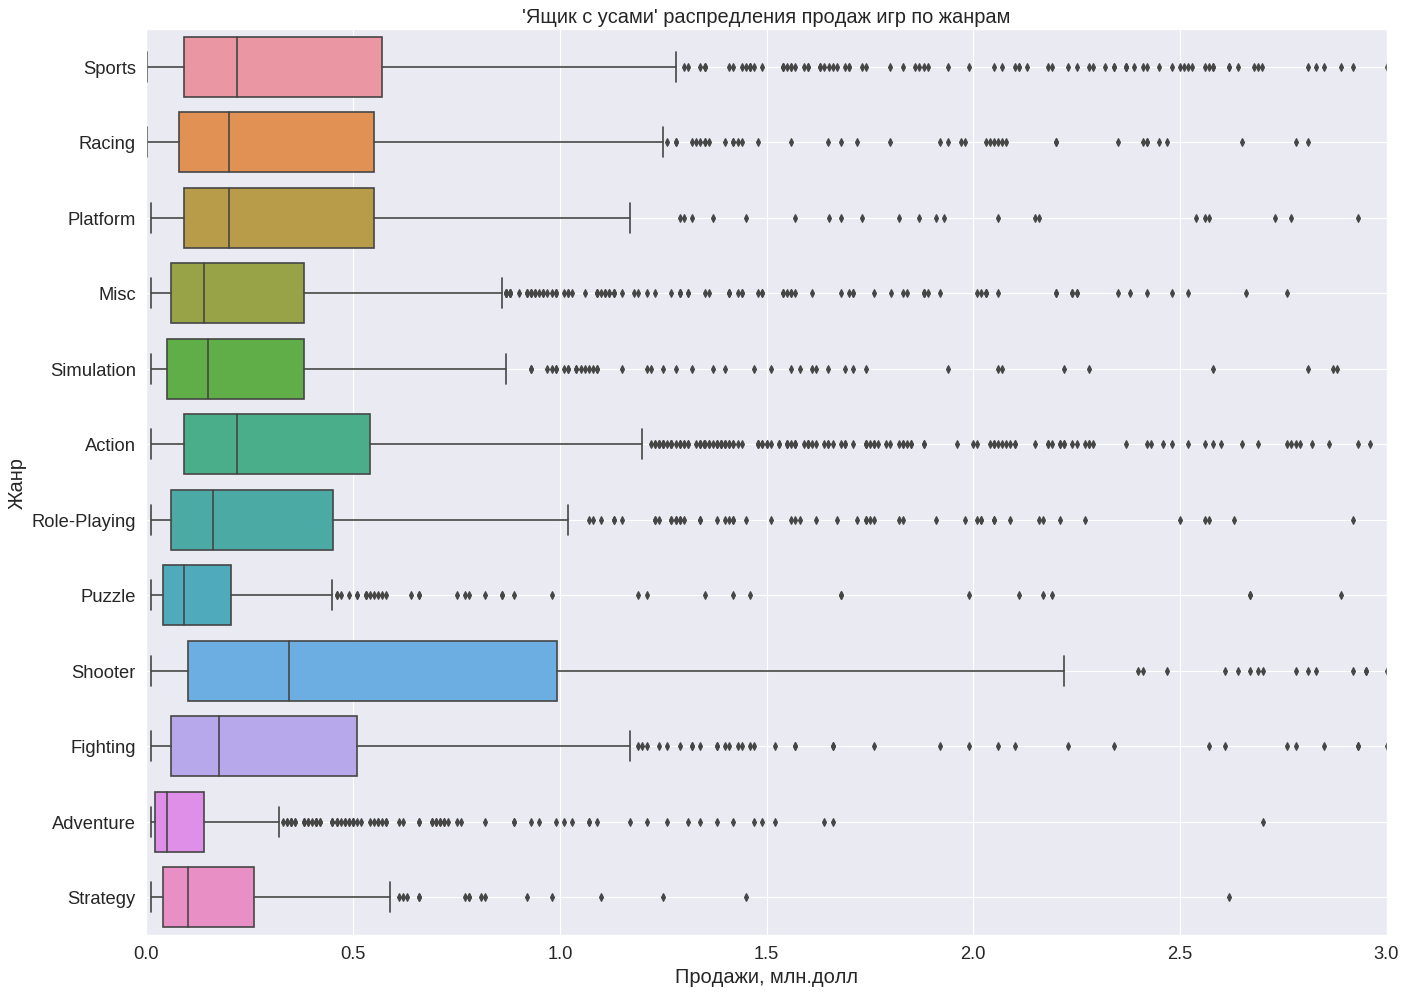

In [52]:
figure(figsize=(20,15),dpi=80)
sns.set(font_scale = 1.5)
chart=sns.boxplot(x=df_games_actual['sales_total'], 
             y=df_games_actual['genre'], 
             data=df_games_actual,orient='h')
plt.style.use('seaborn-dark')
chart.grid(True)
chart.set(xlim=(0,3))
plt.xlabel("Продажи, млн.долл")
plt.ylabel("Жанр")
plt.title("'Ящик с усами' распредления продаж игр по жанрам")
plt.show()

Как видим, самые высокие продажи у шутеров, они идут с большим отрывом. Чаще всего они приносят доход до 2.5 млн.долл с медианой в 0.4 млн.долл.  
Следом идут Fighting, Action, Platform и Sports. Их основная прибыль скромнее, 1.3-1.4 млн.долл, медиана - 0.2 млн.долл.  
Самые низкие продажи у Puzzle и Adventure, из большая часть продаж игры доходит до 0.4 илн.долл, а медиана - 0.1 млн.долл.

### Шаг 4. Составьте портрет пользователя каждого региона

###### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Выделим топ-6 самых популярных платформ. Выделим платформы, которые были актeальны в последние 5 лет и которые набирают популярность. Это PS2,PS3,X360,PS4,Wii,XOne

In [53]:
df_games_top6=df_games_actual[df_games_actual['platform'].isin(['PS2','XOne' , 'X360', 'PS3', 'Wii', 'PS4'])]

In [54]:
df_games_top6.groupby('platform')['na_sales','eu_sales','jp_sales','other_sales'].sum().transform(lambda x: x / x.sum()*100,axis=1)

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
PS2,47.012615,20.433335,11.954228,20.599822
PS3,41.979434,35.133766,8.419385,14.467415
PS4,35.628241,44.636367,4.173302,15.562089
Wii,54.636364,28.979798,7.663300,8.720539
X360,62.002459,27.884175,1.281624,8.831743
XOne,59.210032,31.508598,0.247804,9.033566


Для платформ PS мы видим как происходит смещение аудитории с приоритета в NA на примерно равное распределение среди NA и EU. Схожая динамика наблюдаяется и у Xbox. На старте новой модели XOne можно видеть, как приоритет остается за NA аудиторией, но EU слегка увеличилась. JP во всех платформах занимает последнее место.

###### Самые популярные жанры (топ-5). Поясните разницу.

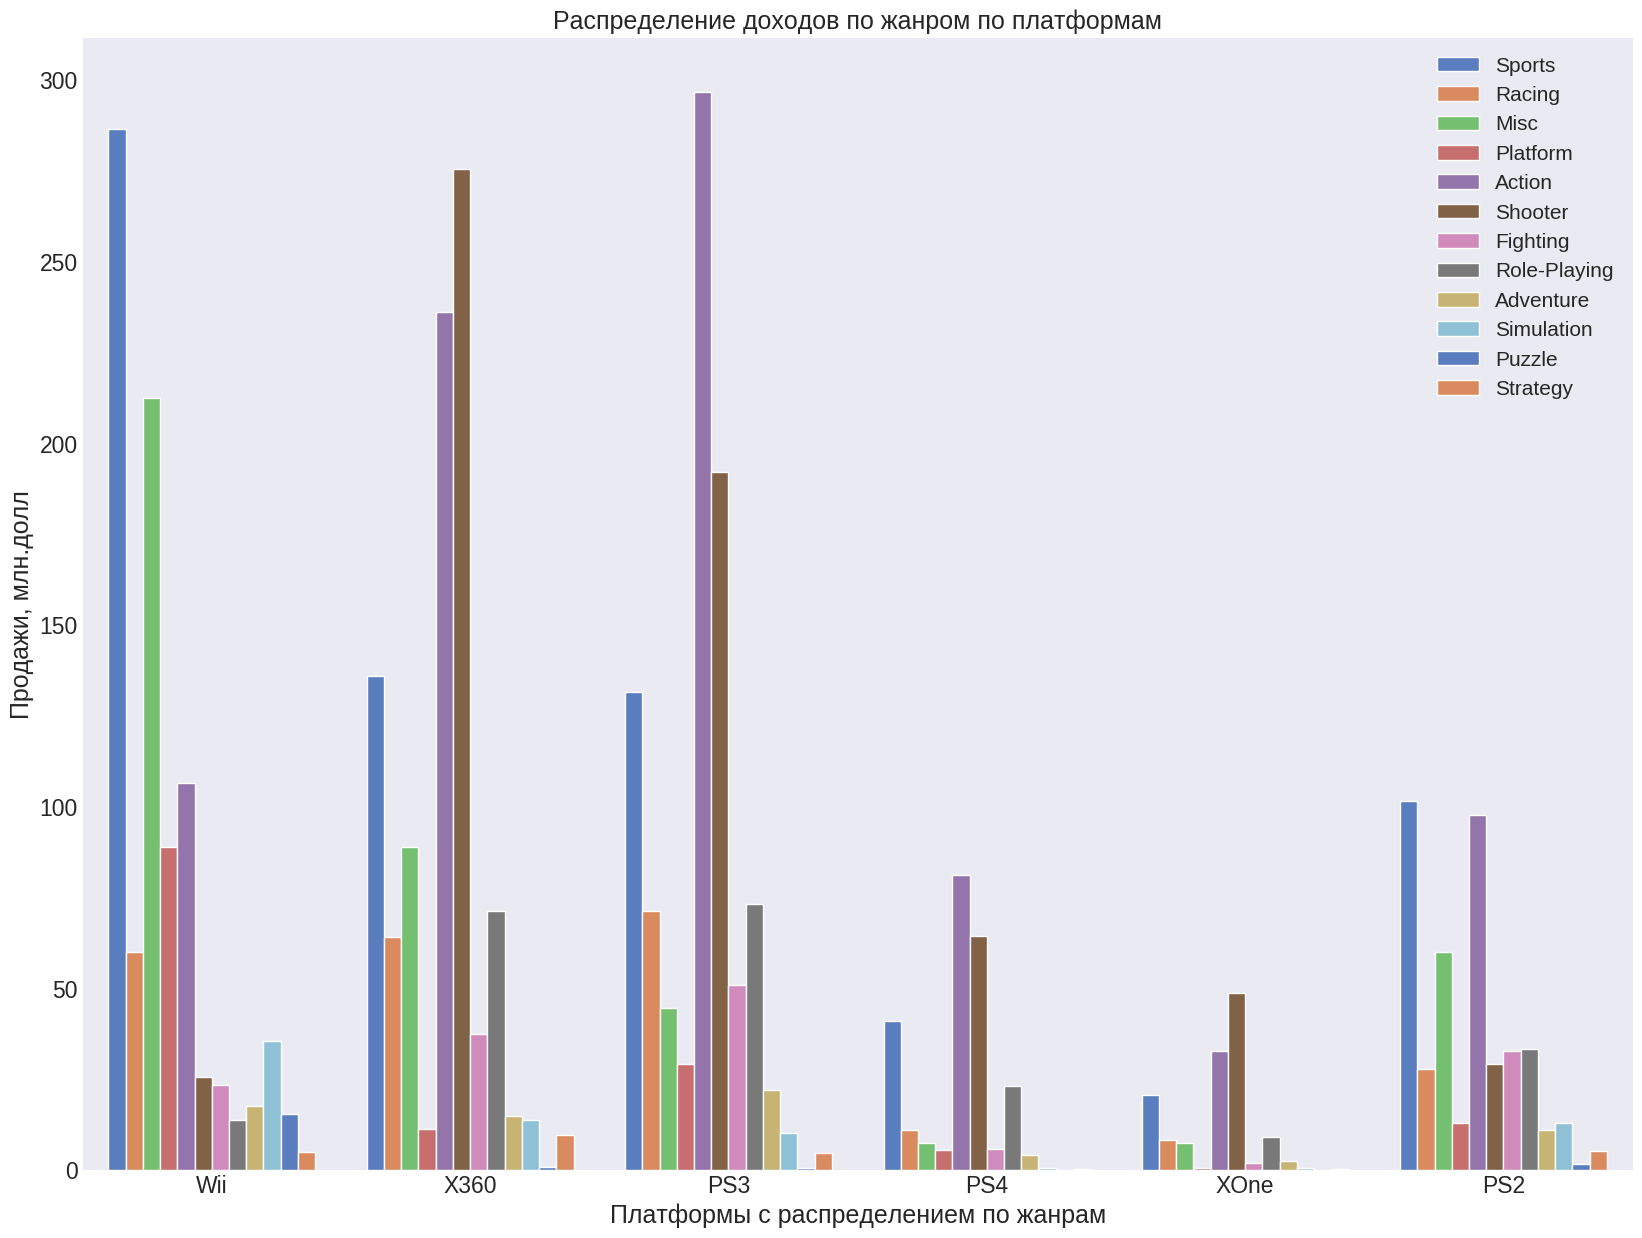

In [55]:
figure(figsize=(20,15),dpi=100)
plt.style.use('seaborn-dark')
(sns.barplot(x='platform', 
             y='sales_total', 
             hue='genre',
             data=df_games_top6,
             ci=None,orient='v',
             dodge=True,estimator = sum,
             palette="muted"))
plt.legend(loc=1,prop={'size': 15})
plt.xlabel("Платформы с распределением по жанрам")
plt.ylabel("Продажи, млн.долл")
plt.title("Распределение доходов по жанром по платформам")
plt.show()

Как видим, изначально пользователи PS2 предпочитали Sports и Action. С появлением новго поколения приставок любители Sports предпочли приставку Wii, а любители Action и Shooter перешли на PS3 и X360. 
Последнее поколение приставок так же отражает данную динамику, мы видим, что у PS4 и XOne пользуются большим спросом те же Action и Shooter.

###### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Произведем замену возрастного рейтинга на цифры по мере ограничения возраста 'K-A'='E'=Все, 'AO'=Взрослые18+'M'=17+, 'T'=страше 13+, 'E10+'=10+ , 'EC'=дети

In [56]:
df_games_top.groupby('rating')['na_sales','eu_sales','jp_sales','other_sales'].agg(['mean', 'median']).sort_values(by=['AO','E','T','M','K-A','EC','E10+'], axis=1)

jp_sales           other_sales           eu_sales           na_sales  \
         median      mean      median      mean   median      mean   median   
rating                                                                        
AO         0.00  0.000000        0.09  0.090000     0.61  0.610000     1.26   
E          0.00  0.045670        0.01  0.060416     0.03  0.178216     0.13   
E10+       0.00  0.027195        0.02  0.056644     0.03  0.136761     0.13   
EC         0.00  0.000000        0.02  0.018333     0.00  0.018333     0.23   
K-A        1.46  1.460000        0.03  0.030000     0.16  0.160000     0.26   
M          0.00  0.048283        0.04  0.134101     0.11  0.349053     0.19   
T          0.00  0.053651        0.02  0.056998     0.04  0.146717     0.12   

                  
            mean  
rating            
AO      1.260000  
E       0.333703  
E10+    0.271102  
EC      0.240000  
K-A     0.260000  
M       0.571998  
T       0.282491

Как видим, явной зависимости нет, можно отметить, что больше всего принояст доход игры для людей 18+, затем для всех,далее для аудитории 17+ и дальше примерно равные доли имеют остальные аудитории.

### Шаг 5. Проверьте гипотезы

###### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Применим гипотезу о равенстве двух генеральных совокупностей. За нулевую гипотезу примем случай равенства средних пользовательских рейтингов платформы XOne и PC.

H0 : user_score_XOne.mean()==user_score_PC.mean()
_____
H1 : user_score_XOne.mean()!=user_score_PC.mean()

In [57]:
user_score_XOne=df_games.query('platform=="XOne"')['user_score'].dropna()

In [58]:
user_score_PC=df_games.query('platform=="PC"')['user_score'].dropna()

In [59]:
user_score_XOne.mean()

6.550412912912914

In [60]:
user_score_PC.mean()

7.0789657523256535

In [61]:
alpha=0.05

In [62]:
result_test1=st.ttest_ind(user_score_XOne,user_score_PC,equal_var=False)

In [63]:
print(result_test1.pvalue)

1.619874837045545e-07


In [64]:
if result_test1.pvalue > alpha:
    print('Нулевую гипотезу не получается отвергнуть')
else:
    print('Нулева гипотеза отвергнута')

Нулева гипотеза отвергнута


Нулевая гипотеза отвергнута, с вероятность близкой к 0 мы могли бы получить такие значения

###### Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Применим гипотезу о равенстве двух генеральных совокупностей. За нулевую гипотезу примем случай равенства средних пользовательских рейтингов платформы XOne и PC.
$$
H0 : user.score.action.mean()!=user.score.PC.mean()
$$
$$
H1 : user.score.sports.mean()==user.score.PC.mean()
$$

In [65]:
user_score_action=df_games.query('genre=="Action"')['user_score'].dropna()

In [66]:
user_score_sports=df_games.query('genre=="Sports"')['user_score'].dropna()

In [67]:
user_score_action.mean()

6.984300211260034

In [68]:
user_score_sports.mean()

7.000913882489099

In [69]:
result_test2=st.ttest_ind(user_score_action,user_score_sports,equal_var=False)

In [70]:
print(result_test2.pvalue)

0.6774349908827907


In [71]:
if result_test2.pvalue < alpha:
    print('Нулевую гипотезу не получается отвергнуть')
else:
    print('Нулева гипотеза отвергнута')

Нулева гипотеза отвергнута


Нулева гипотеза отвергнута, с вероятностью 0.67 мы могли бы получить такие результаты.

### Шаг 6. Напишите общий вывод

- Мы прочитали данные, провели их анализ и предобработку(заменили названия, переменные, попробовали заменить пропуски).  
- Провели исследовательский анализ, выделили актуальный период игр с 2005 года и выделили топ 6 платформ ('PS2','XOne','X360', 'PS3','Wii','PS4')
- Проанализировали распределение выручки по жанрам, зависимость ее от оценок критиков и пользователей. 
- Проанализировали платформы по регионам.
- Проверили гипотезы.
_____
В заключении можно сделать вывод, что перспективными платформами являются PS4 и XOne, можно рассчитывать, что они пробудут на рынке до 10 лет, из которых активный приод конкуренции и высоких доходов составит 5 лет. Их основными жанрами являются Action и Shooter. Самым высокодоходным жанром являюется Shooter(Shooter- большая доля продаж для XOne, Action - PS4)  Основными рынками для данных платформ являются NA и EU.  
Также стоит отметить, что не отмечена линейная корреляция между оценкой игры и доходом от нее. Можно отметить, что игры с низкими оценками критиков редко становятся высокодоходными.  
Так же в зависимости от возрастного рейтинга можно отметить более высокие продажи с рейтингом 18+, затем следуют без ограничения и 17+.  
Гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые была отвергнута.
гипотеза, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные так же была отвергнута, с большей долей вероятности они одинаковые.
Наш идеальный продукт это игра от платформы PS4 или XOne   Action и/или Shooter cоотве, с высокой оценкой критиков, с ограничение по возрасту AO, M, E. Основным рынком сбыта лучше определить NA или EU.